In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
data = pd.read_csv('HousePriceIndexData.csv')
data.head()

,DATE,Case-ShillerHPI,CPI,FEDFUNDS,Monthly Real GDP Index,MORTGAGE30US,Population(thousands),S&P500 Close,UNRATE,DIncome
0,2004-01-01,141.646,186.3,1.00,15134.366,5.7125,292046.0,1131.130005,5.7,37840.0
1,2004-02-01,143.191,186.7,1.01,15258.478,5.6350,292230.0,1144.939941,5.6,37884.0
2,2004-03-01,145.058,187.1,1.00,15355.141,5.4450,292434.0,1126.209961,5.8,38011.0
3,2004-04-01,146.592,187.4,1.00,15311.370,5.8300,292651.0,1107.300049,5.6,38111.0
4,2004-05-01,148.185,188.2,1.00,15446.432,6.2700,292872.0,1120.680054,5.6,38272.0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    240 non-null    object 
 1   Case-ShillerHPI         240 non-null    float64
 2   CPI                     240 non-null    float64
 3   FEDFUNDS                240 non-null    float64
 4   Monthly Real GDP Index  240 non-null    float64
 5   MORTGAGE30US            240 non-null    float64
 6   Population(thousands)   240 non-null    float64
 7   S&P500 Close            240 non-null    float64
 8   UNRATE                  240 non-null    float64
 9   DIncome                 240 non-null    float64
dtypes: float64(9), object(1)
memory usage: 18.9+ KB


In [78]:
data.isna().sum()

DATE                      0
Case-ShillerHPI           0
CPI                       0
FEDFUNDS                  0
Monthly Real GDP Index    0
MORTGAGE30US              0
Population(thousands)     0
S&P500 Close              0
UNRATE                    0
DIncome                   0
dtype: int64

In [79]:
data.set_index('DATE', inplace=True)

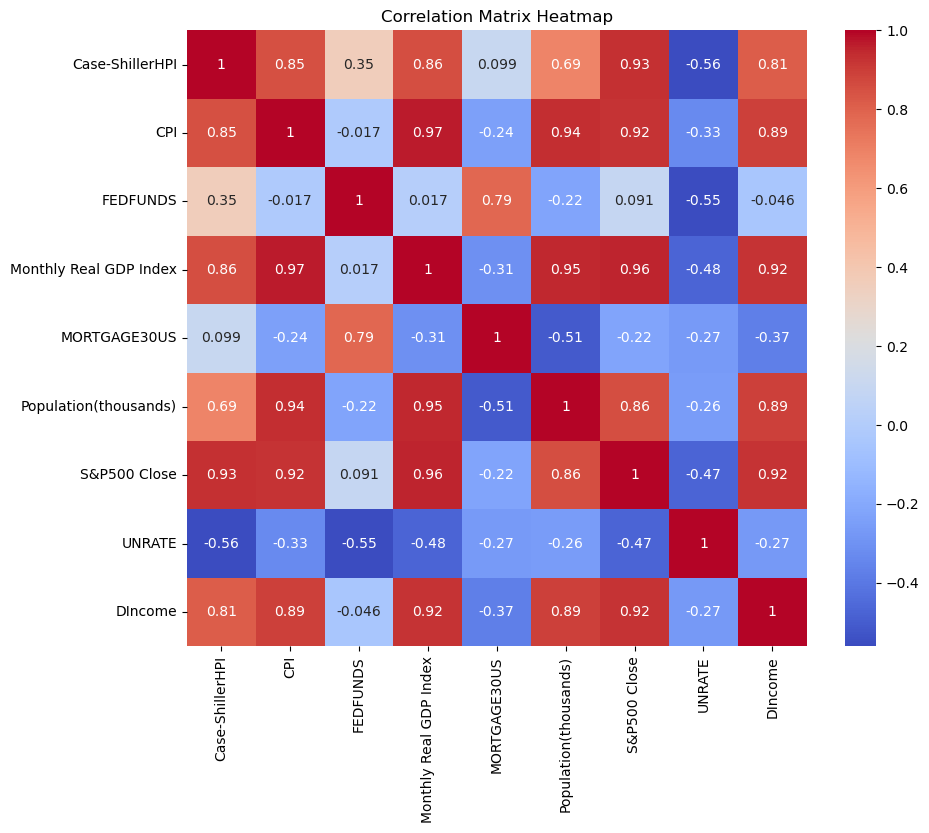

In [80]:
# Create a correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

From above correlation matrix,

1. CPI, Monthly Real GDP Index, Median House Price, S&P500 Close and DIncome have strong positive correlation with Home Price Index.

2. FEDFUNDS, Population(thousands) have moderate positive correlation with Home Price Index.

3. MORTGAGE30US has weak positive correlation with Home Price Index

4. UNRATE which is Unemployment Rate has moderate negative correlation with Home Price Index which does make sense.

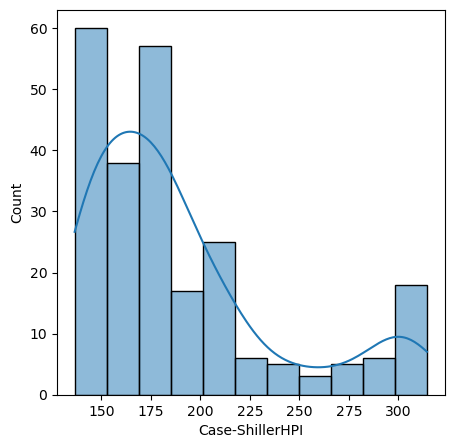

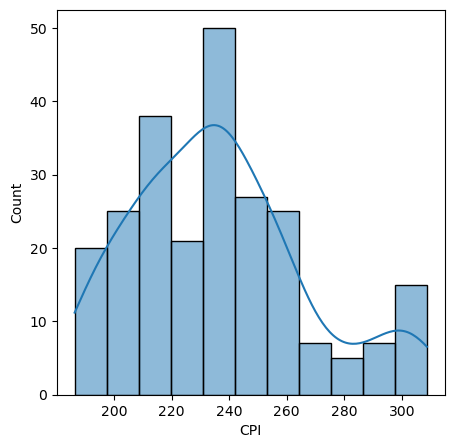

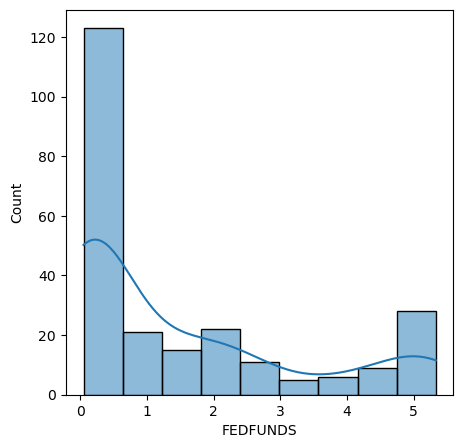

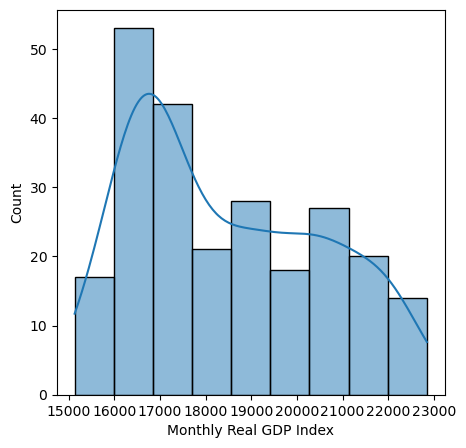

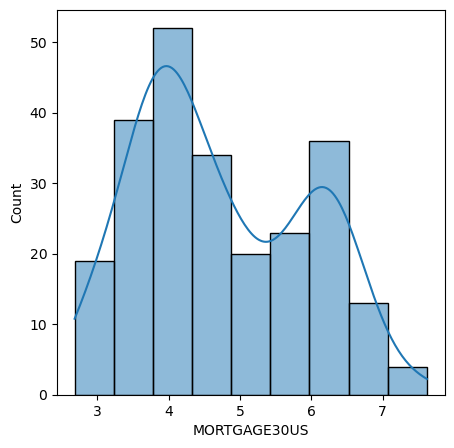

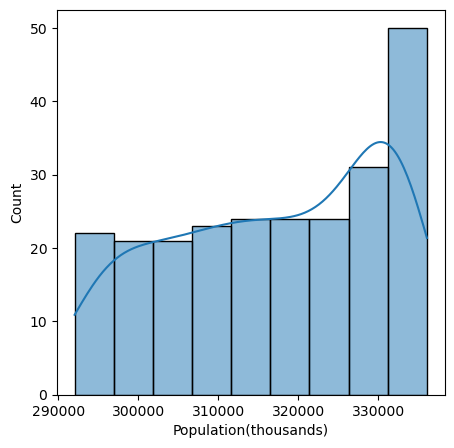

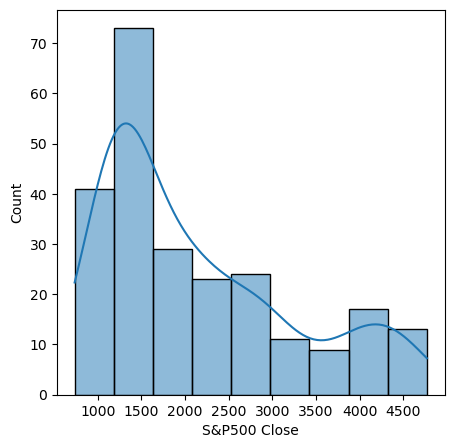

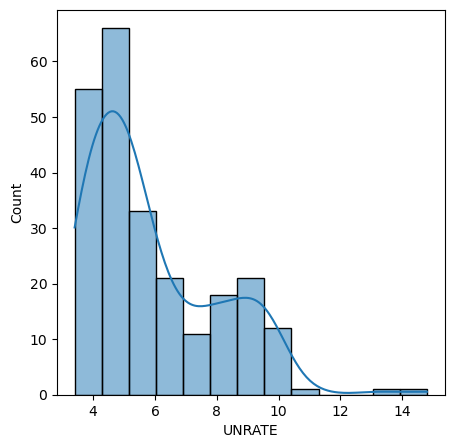

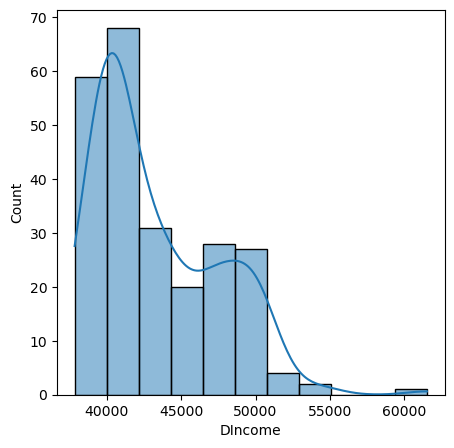

In [81]:
for column in data:
  plt.figure(figsize=(5,5))
  sns.histplot(data[column], kde=True)

From above plots, since the data is real world data it is not completely normally distributed i.e. bell shaped curve, and has some skewness. 

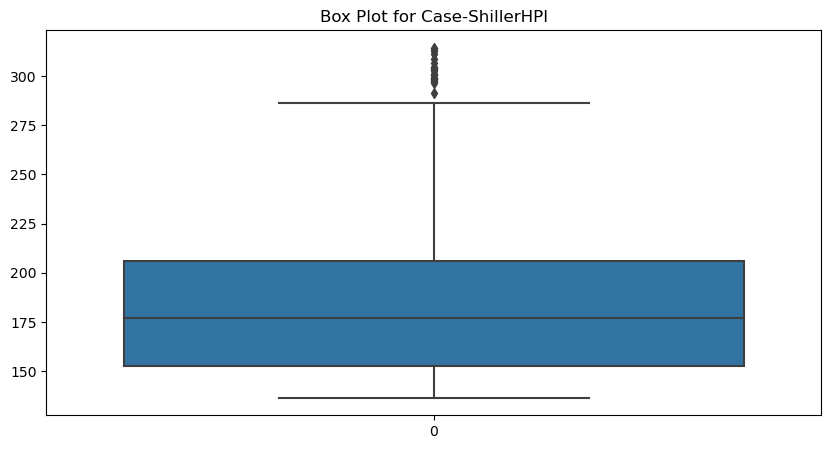

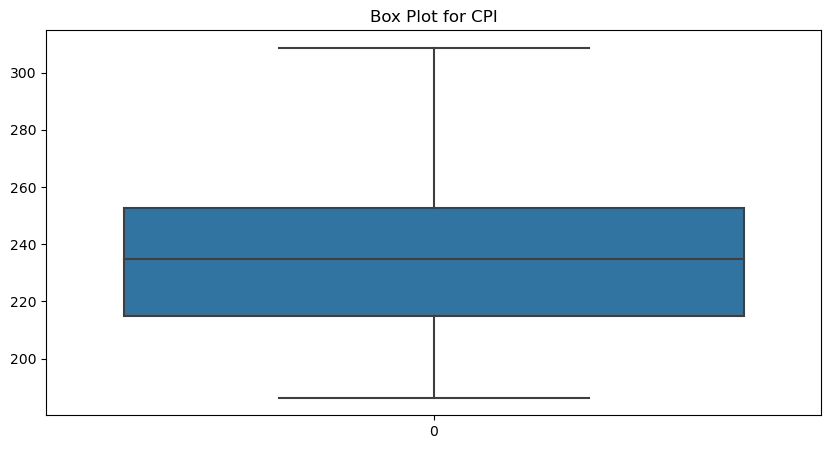

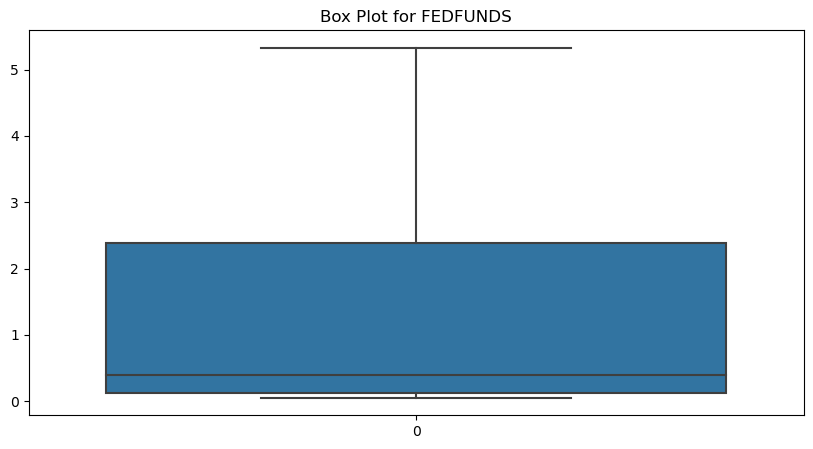

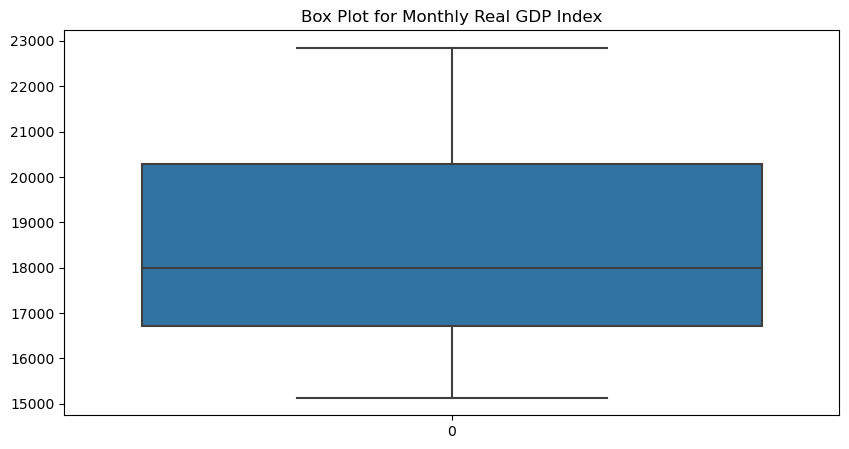

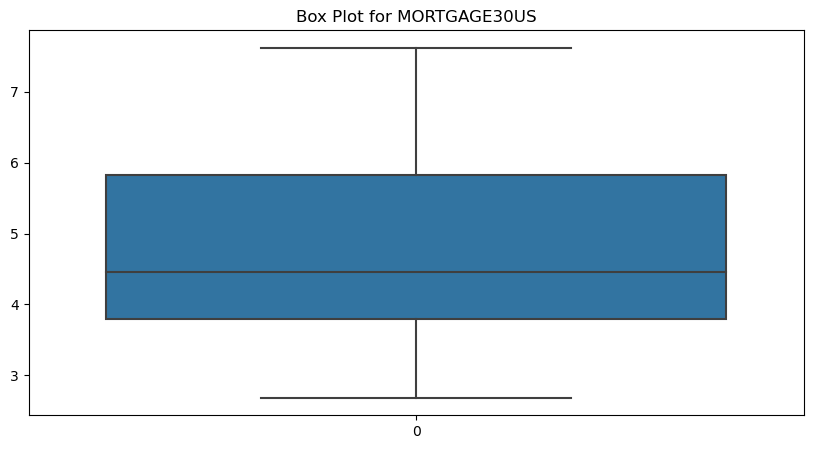

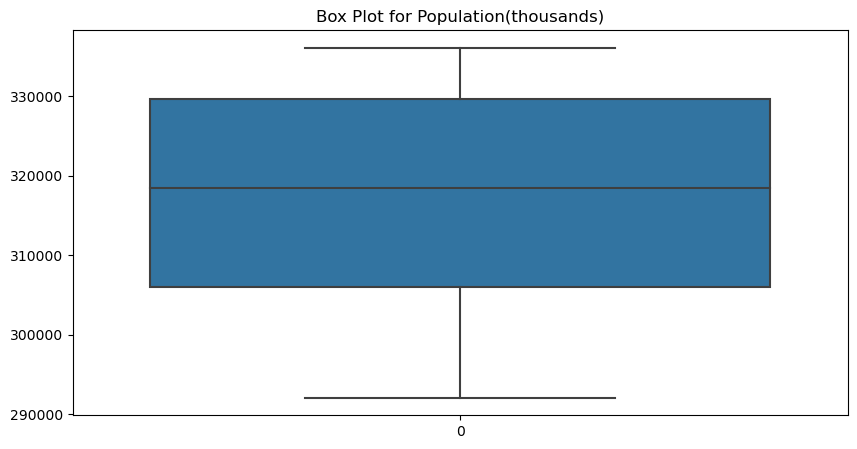

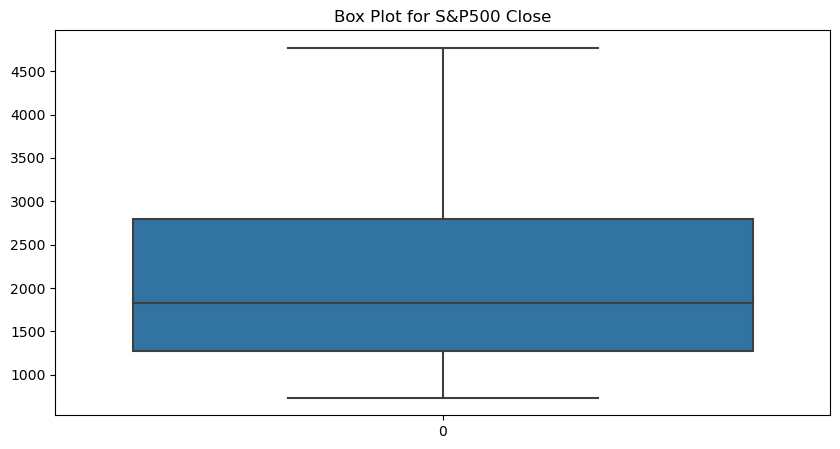

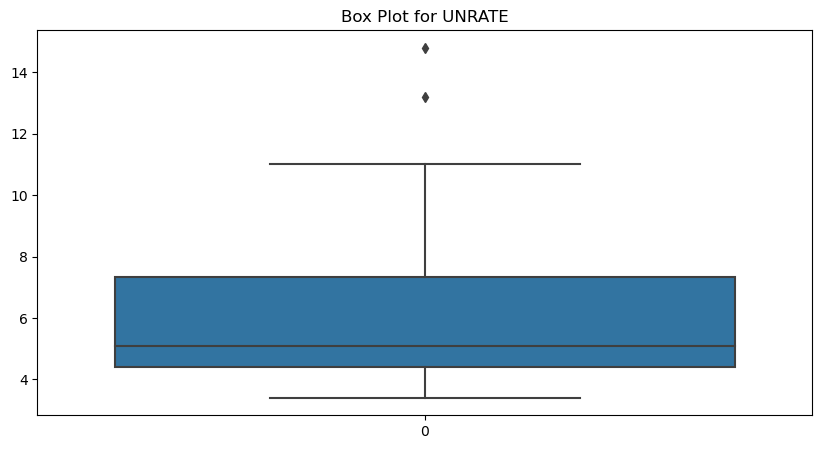

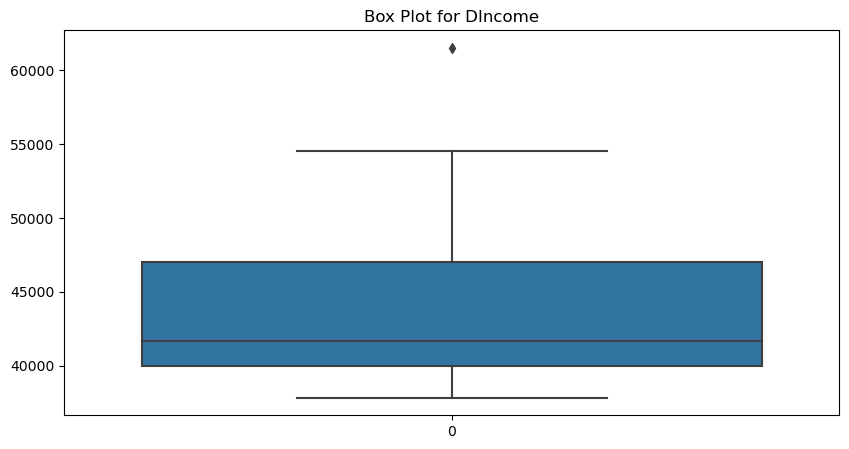

In [82]:
for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

As it is real world data, it does have few outliers due to occurence of some events in the real world

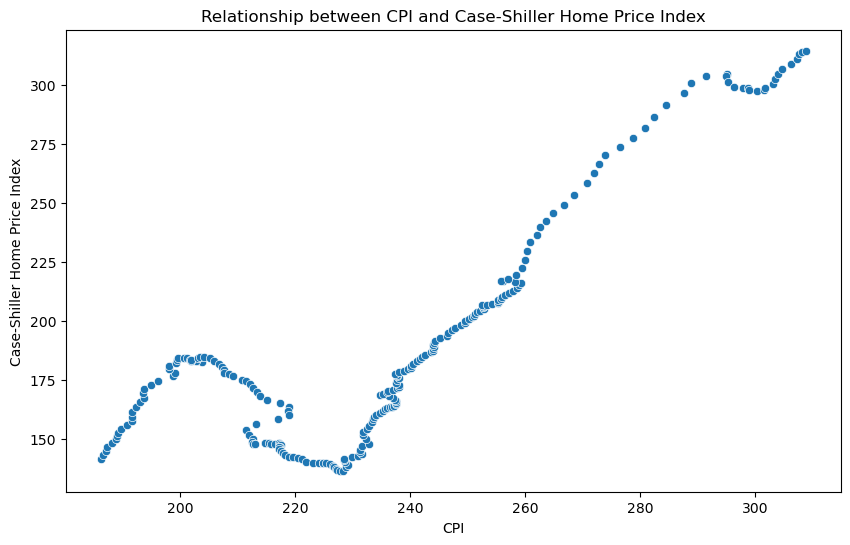

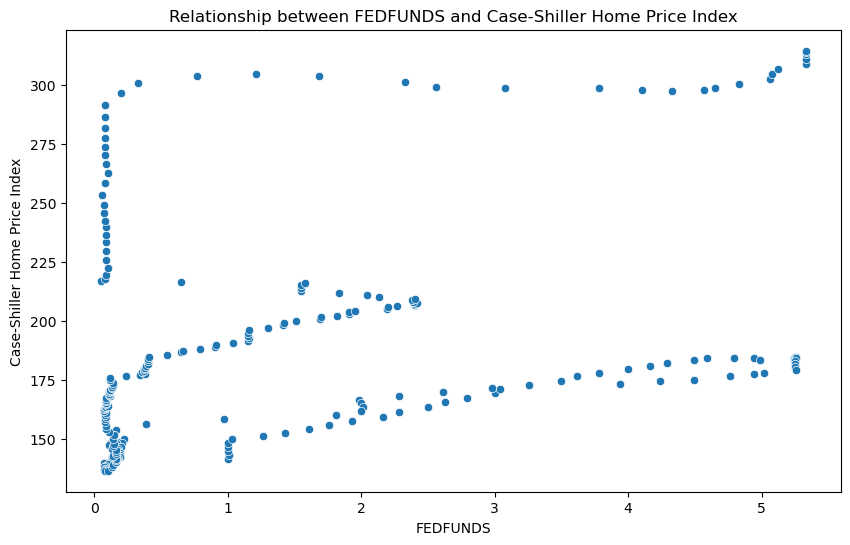

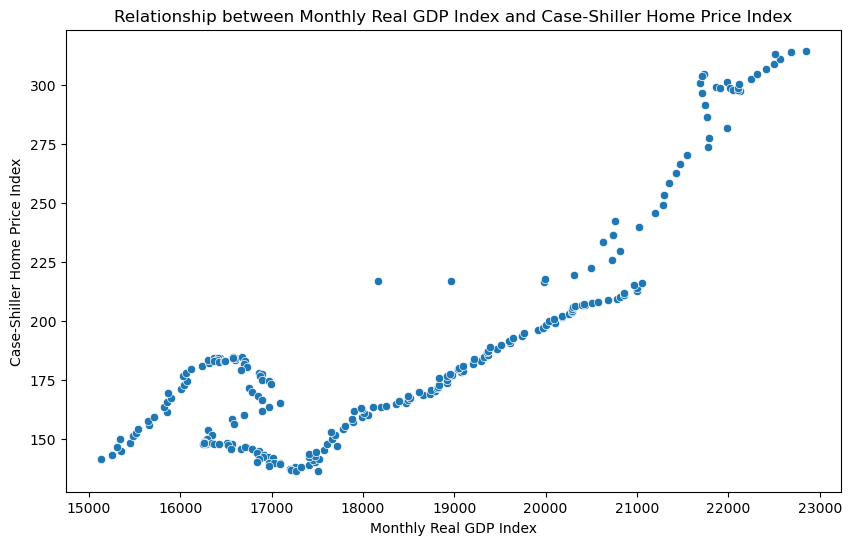

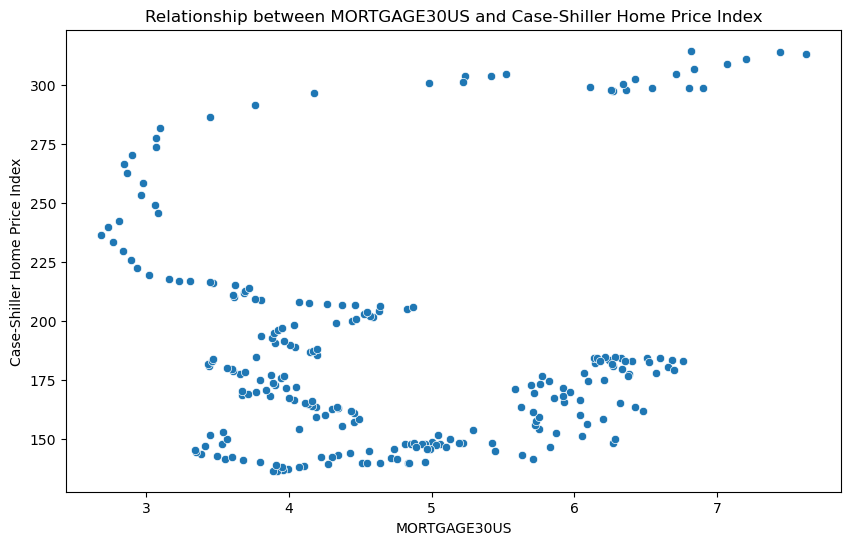

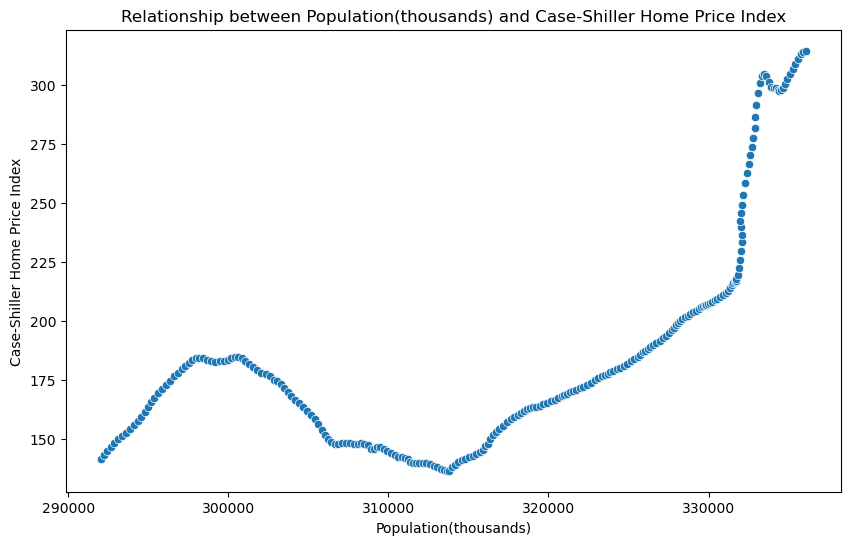

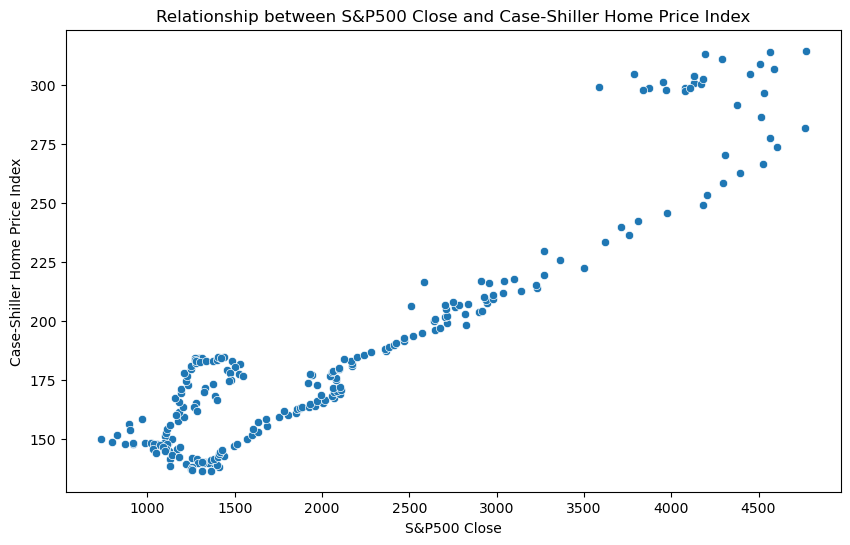

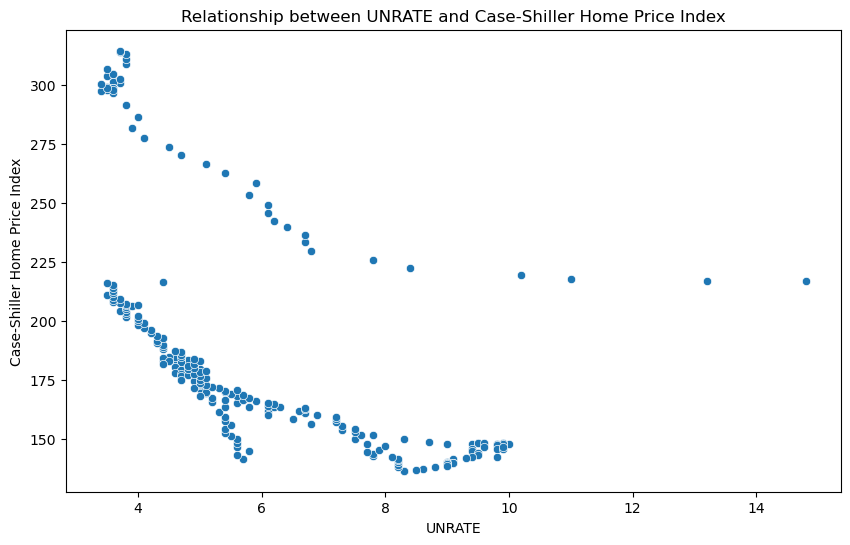

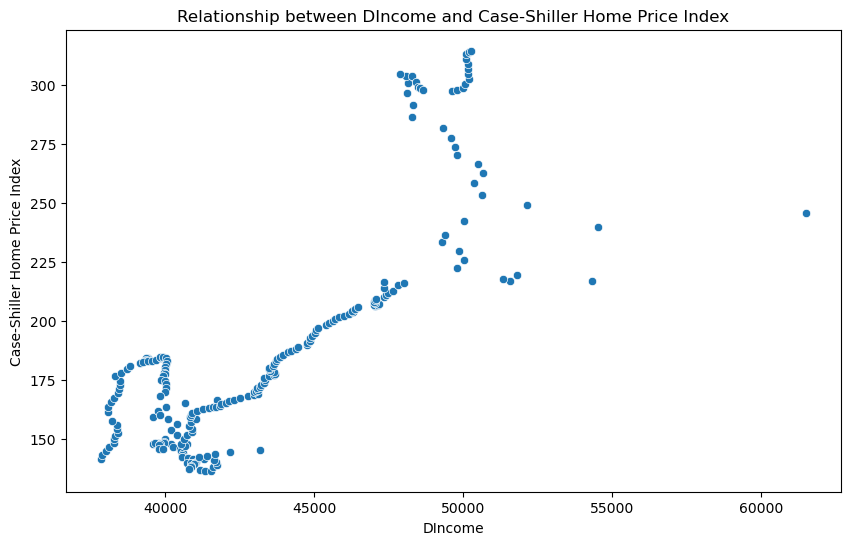

In [83]:
# Defining input and target variables
X = data.drop(columns=['Case-ShillerHPI'])
y = data['Case-ShillerHPI']

# Plotting relationship of each input variable with output variable
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[column], y=y)
    plt.title(f'Relationship between {column} and Case-Shiller Home Price Index')
    plt.xlabel(column)
    plt.ylabel('Case-Shiller Home Price Index')
    plt.show()

Based on above plots, there is a sort of linear relationship between CPI and Home Price Index, Monthly Real GDP Index and Home Price Index, Median House Price Sold and Home Price Index, Population and Home Price Index, S&P500 Closing value and Home Price Index. 

The reason for having sort of linear relationship and not complete linear relationship is that there are some real world factors which can't be determined or quantified these are also known as stochastic error. 

Due to these real world stochastic errors the data is sort of linear and not completely linear.

In [84]:
X.describe()

,CPI,FEDFUNDS,Monthly Real GDP Index,MORTGAGE30US,Population(thousands),S&P500 Close,UNRATE,DIncome
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,236.058100,1.496458,18470.631250,4.732100,317047.191667,2144.593290,5.892083,43335.170833
std,29.871427,1.775589,2069.742099,1.181728,13216.524814,1090.786181,2.102235,4177.485050
min,186.300000,0.050000,15134.366000,2.684000,292046.000000,735.090027,3.400000,37840.000000
25%,214.774000,0.120000,16708.926500,3.801375,305983.000000,1275.045013,4.400000,39992.750000
50%,234.733000,0.400000,17985.938500,4.456750,318370.000000,1827.085022,5.100000,41707.000000
75%,252.768250,2.382500,20284.323000,5.822500,329685.750000,2792.440002,7.350000,46998.250000
max,308.742000,5.330000,22846.137000,7.620000,336070.000000,4769.830078,14.800000,61509.000000


The mean values of each input variable are different.

In linear models, if features have very different means, the coefficients can be harder to interpret. 

The coefficients represent the change in the target variable for a one-unit change in the feature. If the scales of the features are very different, comparing the magnitude of coefficients to understand feature importance becomes challenging.



As we have seen in earlier plots, our data does not follow a Gaussian (normal) distribution.

So we'll be applying Normalisation feature scaling technique also known as min-max scaling, is the process of transforming data to fit within a specific range, typically [0, 1] or [-1, 1].

##### Formula for normalisation is given below:

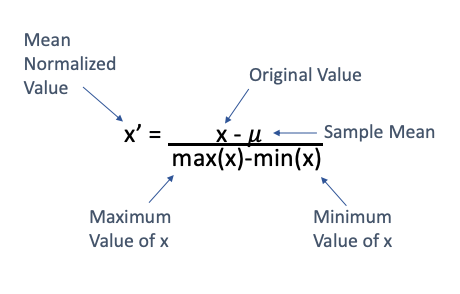

In [85]:
# Applying min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

### Defining Input and Target variable

In [86]:
X = scaled_data.drop(columns=['Case-ShillerHPI'])
y = scaled_data['Case-ShillerHPI']

### Splitting data for Training and Testing

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (168, 8)
Testing set size: (72, 8)


### Model Building

#### Multiple Linear Regression Model.

As it is relevant for establishing a simple baseline model to understand the linear relationships between economic factors (e.g., CPI, FEDFUNDS Rate) and the house price index, providing clear interpretability.



In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

### Evaluation of Multiple Linear Regression

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

print("Multiple Linear Regression - Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))

print("Multiple Linear Regression - Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))

print("Multiple Linear Regression - Train R^2:", r2_score(y_train, y_train_pred_lr))

print("Multiple Linear Regression - Test R^2:", r2_score(y_test, y_test_pred_lr))


Multiple Linear Regression - Train RMSE: 0.04161802809012041
Multiple Linear Regression - Test RMSE: 0.05618190110661488
Multiple Linear Regression - Train R^2: 0.9747601019983081
Multiple Linear Regression - Test R^2: 0.9611424304716361


The R^2 Score indicates that model has fitted really good

### Random Forest Regression Model

Random Forest is applied to capture complex, non-linear interactions among the economic factors influencing the house price index, offering robust predictions and identifying key drivers through feature importance.

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [94]:
best_rf_model = grid_search.best_estimator_

In [95]:
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)


### Evaluation of Random Forest Model

In [96]:
print("Random Forest - Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("Random Forest - Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("Random Forest - Train R^2:", r2_score(y_train, y_train_pred_rf))
print("Random Forest - Test R^2:", r2_score(y_test, y_test_pred_rf))


Random Forest - Train RMSE: 0.0037733049665985164
Random Forest - Test RMSE: 0.01122537363720526
Random Forest - Train R^2: 0.9997925237393931
Random Forest - Test R^2: 0.9984487407587102


The R^2 Score for Random Forest indicates that this model has also fitted really good.

### Plotting Feature Importance Plot

In [97]:
feature_importances = best_rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


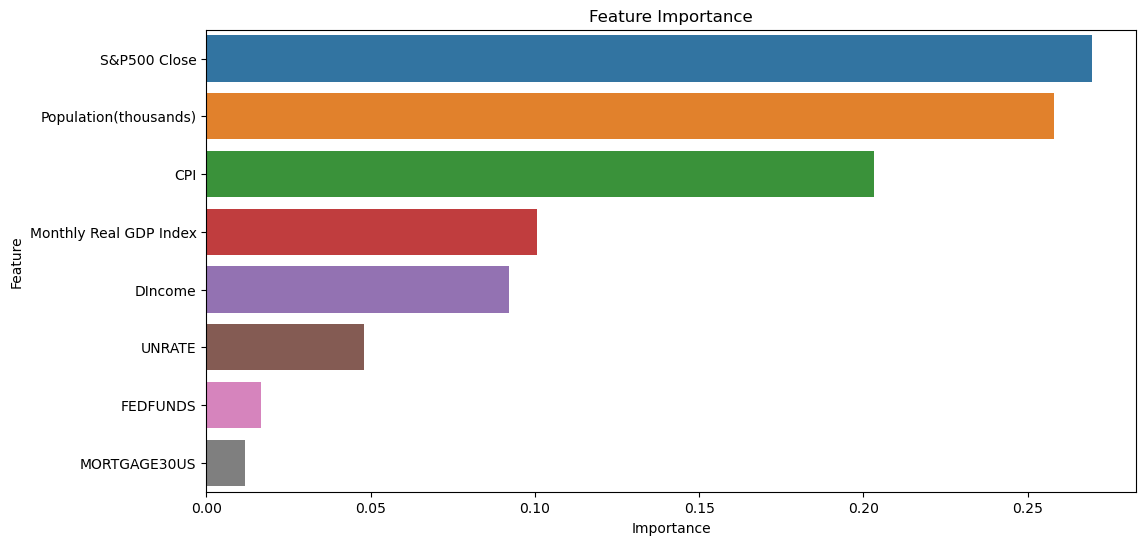

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

Radom Forest has given importance to S&P500 Close value, Popluation, CPI meaning that these factors have more effect on the Home Price Index than others.

While, Monthly GDP, Disposable Income also has some influence on the Home Price Index

### OLS Statistical Method

OLS Regression is used to statistically validate the significance of each economic factor on the house price index, allowing for diagnostic checks and hypothesis testing to ensure model reliability.

In [99]:
X_train_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:        Case-ShillerHPI   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     767.6
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          7.73e-123
Time:                        18:12:30   Log-Likelihood:                 295.73
No. Observations:                 168   AIC:                            -573.5
Df Residuals:                     159   BIC:                            -545.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=a

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sq

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=aut

### From above summary, 

#### If we talk about the coefficients,

A coefficient of 0.4844 for the CPI indicates that higher CPI are associated with higher house prices.

A coefficient of 0.0521 for the Federal Funds Rate indicates that's 1% increase in Federal Funds rate is associated with 0.05% increase in house price index.

A coefficient of 0.1480 for the mortgage rate indicates that 1% increase in Mortgage rates is associated with 0.15% increase in house price index.

A coefficient of 0.7365 for the S&P500 Close value indicates that higher S&P500 Close value are associated with higher house prices.

A coefficient of 0.3673 for the Disposable Income indicates that higher Disposable Income are associated with higher house prices.

A coefficient of -0.0528 for the Monthly Real GDP Index indicates that 1% increase in Monthly Real GDP Index is associated with 0.05% decrease in house price index.

A coefficient of -0.4017 for the Population(thousands) indicates that 1% increase in Population(thousands) is associated with 0.4% decrease in house price index.

A coefficient of -0.0973 for the Unemployment Rate indicates that higher Unemployment rate are associated with lower house prices.



#### If we talk about P-value

The p-value for CPI, Federal Funds Rate, Mortgage Rate, Population in thousands, S&P500 Close, Disposable Income is less than 0.05, indicating that the all mentioned factors have significant effect on Home Price Index.


The adjusted R^2 is slightly lower than the R^2, it still indicates a good fit, but accounts for the potential overfitting due to multiple predictors.

Based on above models and analysis, we can say that

##### CPI, S&P500 Close, Population, Monthly GDP, Unemployment rate and Mortgage Rate have significant influence on Home Price Index.

#### Limitations:
1) The data collected was too small in size.

2) Due to multiple predictors, we have faced the issue of overfitting while model building.

3) PCA can be applied to overcome the challenge of overfitting.
